# Vrushal Bhegade
# Pg44
# Diabetes Prediction

# Synopsis

Problem Statement-
The objective of the dataset is to diagnostically predict whether or not a patient has diabetes.
In particular, all patients here are females at least 21 years old. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
Steps Followed:
1] Data Analysis: Performed various operations to get more information about the data
2] Data Cleaning: Performed data cleaning to treat outliers, missing values, null values etc
3] Feature Selection: Performed forward and backward stepwise feature selection methods
4] Machine Learning: Developed various machine learning models and obtained accuracy of 83.83%

### The purpose of this Algorithm is to predict based on diagnostic measurements whether a patient has diabetes and this is a classification problem.

# -----------------------------------------------------------------------------------------------------------

####   Importing pandas library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings("ignore")

####    Reading the data into pandas frame

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
data = pd.read_csv(r'Diabetes.csv', header=None, names=col_names)

####     Examine the data

In [3]:
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.dtypes

pregnant      int64
glucose       int64
bp            int64
skin          int64
insulin       int64
bmi         float64
pedigree    float64
age           int64
label         int64
dtype: object

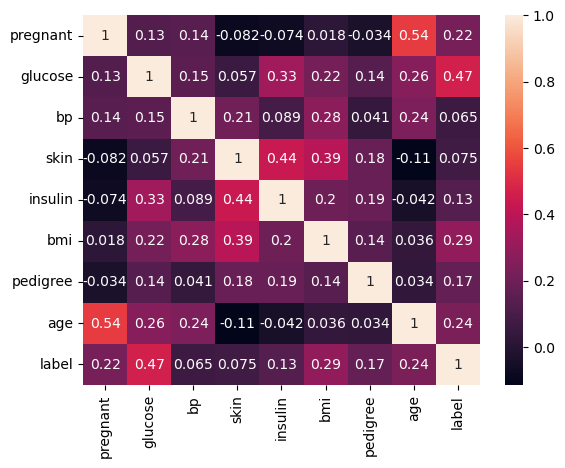

In [6]:
#Data visulization (Heat map of corr)
sns.heatmap(data.corr(),annot=True);

####    The data type of all the features is correct we will not change it

In [7]:
data.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


####    We can observe from the statistics that the maximum value of insulin is above 3 standard deviations that means there are outliers in the insulin column so we will remove the data which is 2 standard deviations above

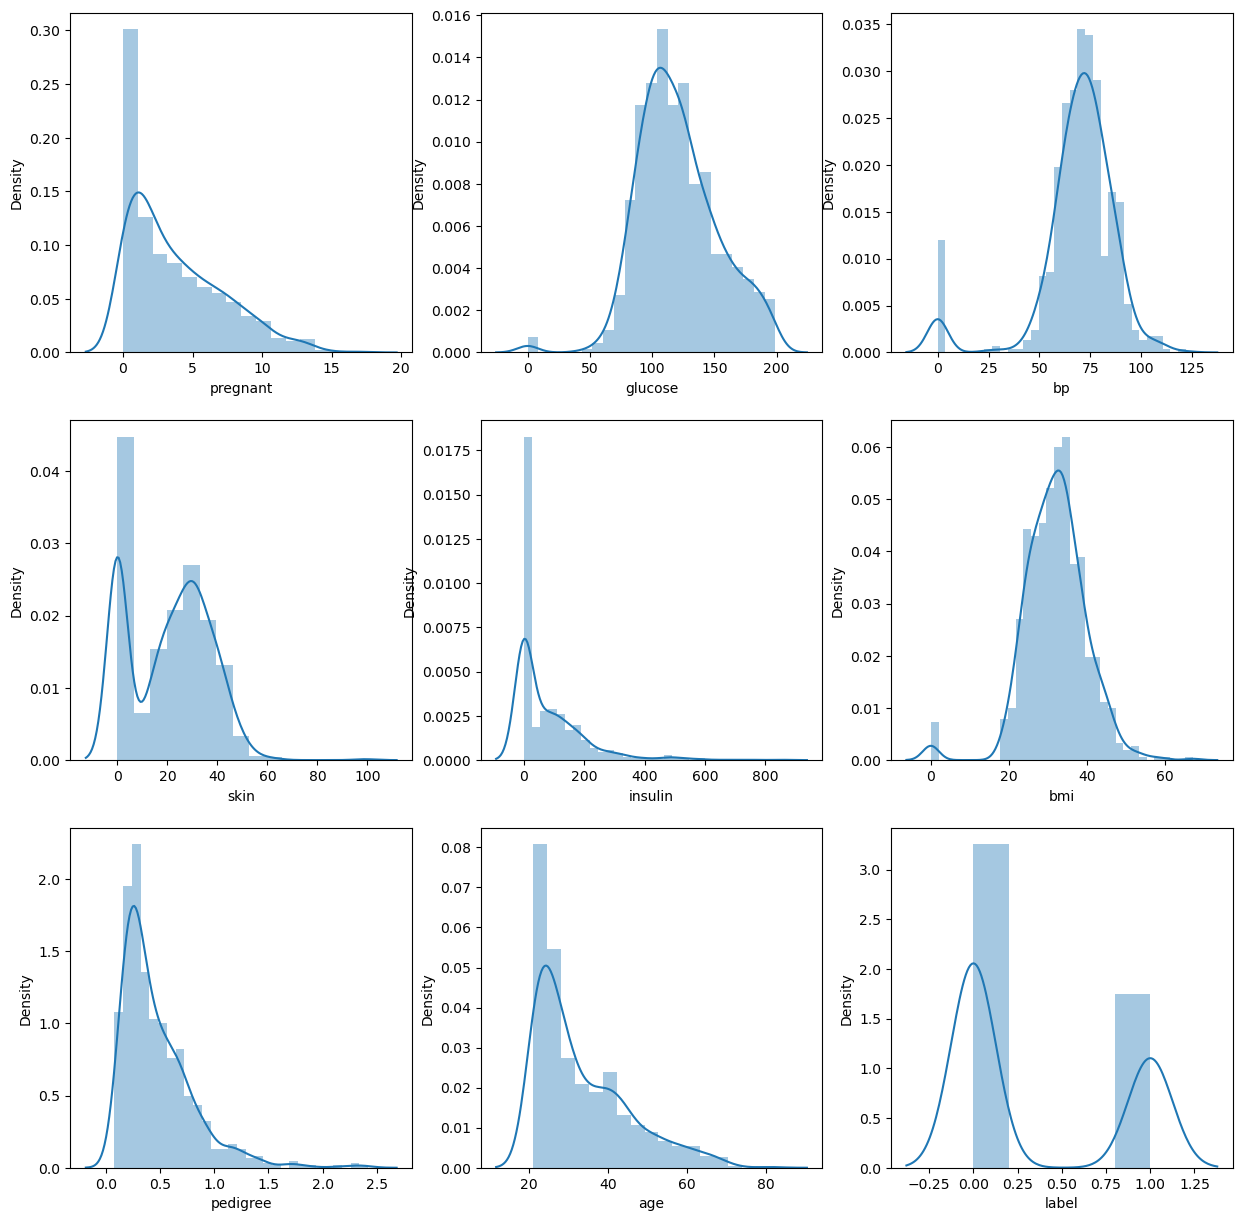

In [8]:
#Data visulization
data_col=data.columns
fig,ax=plt.subplots(nrows=3,ncols=3,figsize=[15,15])
for col, sub in zip(data_col,ax.flatten()):
    sns.distplot(data[col],ax=sub);

The col glucose & bmi  seems to be normally distributed.

pregnant,insulin,age and pedigree cols seems to be right skewed

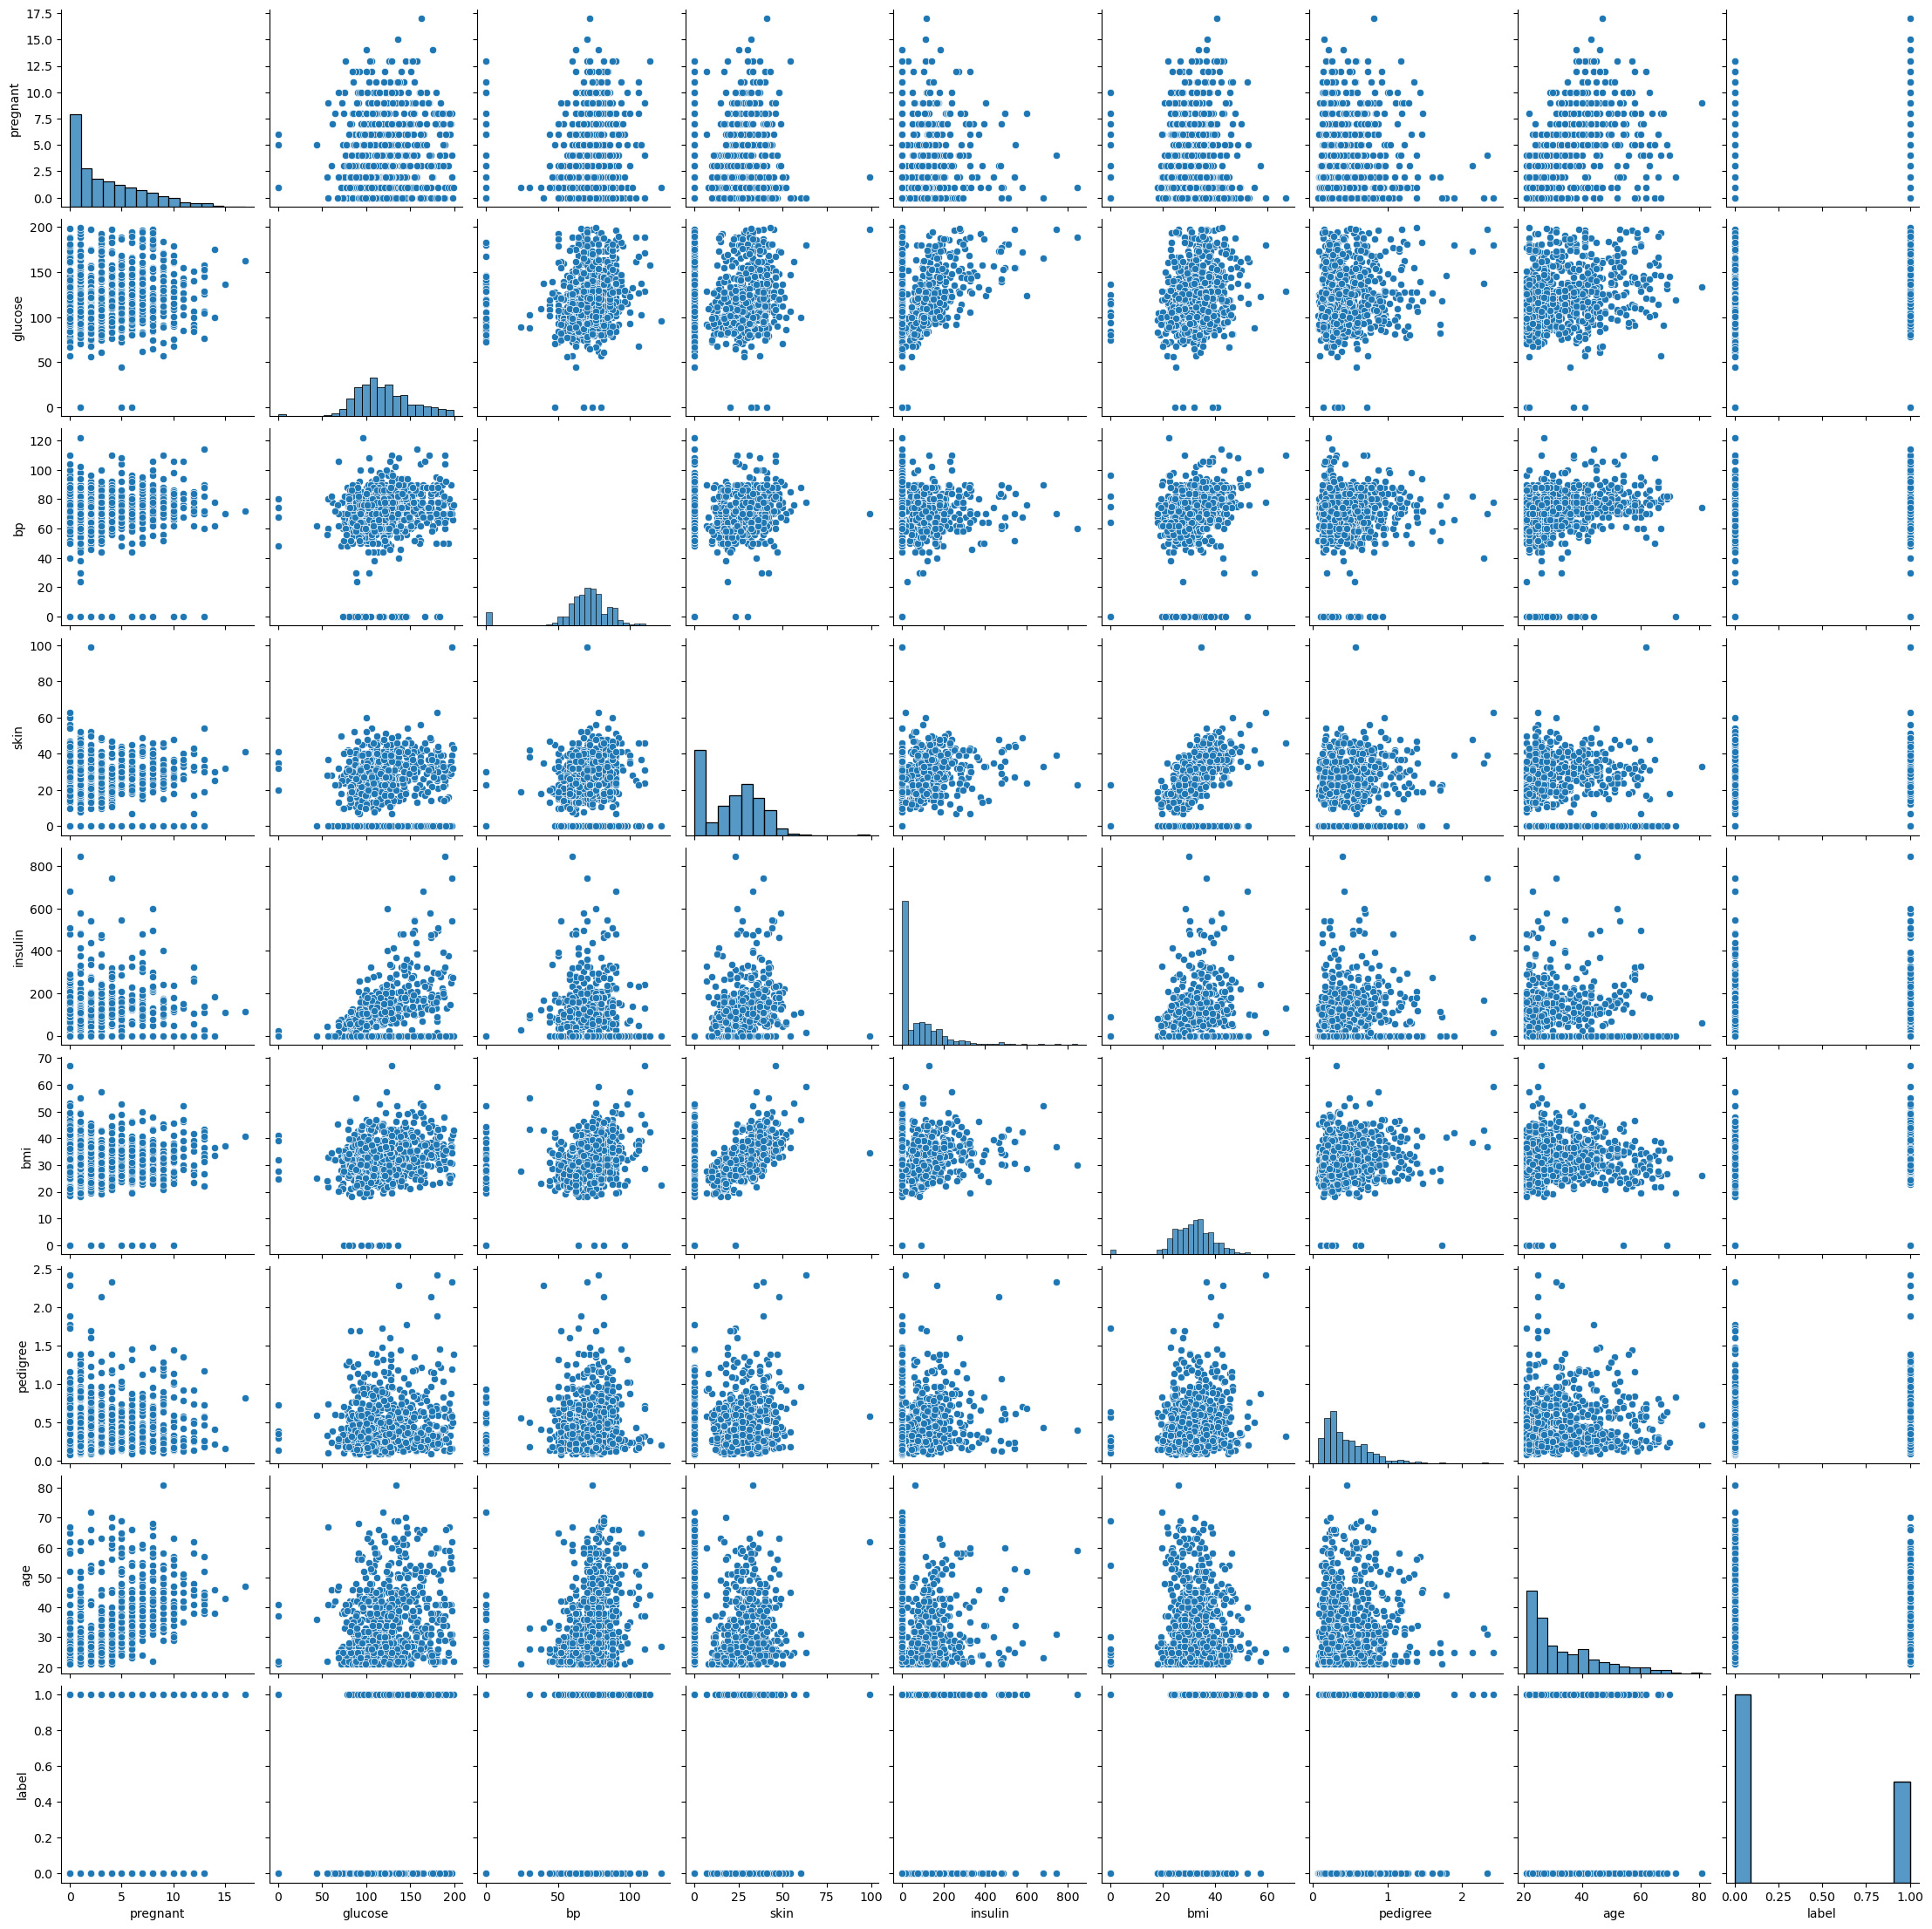

In [9]:
#Data visulization (Pair plot)

sns.pairplot(data=data);      #  Pairplot allows us to plot pairwise relationships between variables.

In [10]:
data.loc[((data['insulin'] > 425))] = np.nan

In [11]:
data.isnull().sum()

pregnant    18
glucose     18
bp          18
skin        18
insulin     18
bmi         18
pedigree    18
age         18
label       18
dtype: int64

####   Since the dataset is small we can not drop the rows so, in this case we will use imputing method and replace the null value with mean

In [12]:
for f in ['pregnant', 
          'glucose', 
          'bp', 
          'skin',
          'insulin','bmi','pedigree','age','label']:
    data.loc[data[f].isnull(), f] = data[f].mean()

In [13]:
data.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

### Now our dataset is clean so we will start building the classification model

####  Prepare X and y in pandas

In [14]:
feature_cols = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age']
X = data[feature_cols]
y = data.label

####   Split the dataset in training and test datset. Assign random sate variable in order to get same training and test dataset everytime

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

####   Fit a logistic regression model

In [17]:
logreg.fit(X_train, y_train.astype(int))

LogisticRegression()

####  The regression coefficients and intercept

In [18]:
print(logreg.intercept_)
print(logreg.coef_)

[-7.98545571]
[[ 1.09979667e-01  3.52240260e-02 -1.47903679e-02 -3.69739259e-03
  -8.97288443e-04  8.63135759e-02  1.01648871e+00  1.01529872e-02]]


## Feature Selection

#####  First Imporant feature 

In [20]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
for f in feature_cols:
    X = data[[f]]
    cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
    print(f, cv_auc)

pregnant 0.6232993966817496
glucose 0.7843612368024132
bp 0.5956561085972851
skin 0.5481485671191554
insulin 0.521160633484163
bmi 0.6957865761689292
pedigree 0.6046236802413274
age 0.6837021116138764


#### It is clear from the above result that glucose it the most important feature now we will find second most imp feature

In [21]:
for f in feature_cols:
    if f not in ['glucose']:
        X = data[['glucose', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

pregnant 0.8006221719457013
bp 0.7830173453996984
skin 0.7806726998491704
insulin 0.7832782805429864
bmi 0.8115580693815987
pedigree 0.7929653092006033
age 0.7947601809954751


#### Now second most important feature is bmi lets find out third most important

In [22]:
for f in feature_cols:
    if f not in ['glucose', 'bmi']:
        X = data[['glucose', 'bmi', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

pregnant 0.8245595776772247
bp 0.8130015082956261
skin 0.8091553544494721
insulin 0.811003016591252
pedigree 0.8192820512820512
age 0.8204358974358975


#### Now third most important feature is pregnant lets find out fourth most important

In [23]:
for f in feature_cols:
    if f not in ['glucose', 'bmi', 'pregnant']:
        X = data[['glucose', 'bmi', 'pregnant', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

bp 0.824817496229261
skin 0.8219909502262442
insulin 0.8222518853695323
pedigree 0.8315610859728505
age 0.8229638009049773


#### Fourth most iportant feature is pedigree lets find fifth imp feature

In [24]:
for f in feature_cols:
    if f not in ['glucose', 'bmi', 'pregnant', 'pedigree']:
        X = data[['glucose', 'bmi', 'pregnant', 'pedigree', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

bp 0.8321960784313726
skin 0.8295942684766213
insulin 0.8323016591251886
age 0.828502262443439


#### Fifth most important feature is insulin let's find sixth imp feature

In [25]:
for f in feature_cols:
    if f not in ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin']:
        X = data[['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

bp 0.8325505279034691
skin 0.8306259426847662
age 0.8298642533936651


#### Sixth feature would be bp and lets find the next one

In [26]:
for f in feature_cols:
    if f not in ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp']:
        X = data[['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp', f]]
        cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
        print(f, cv_auc)

skin 0.8296440422322775
age 0.8289411764705882


### Now we know the ranking of the features so we will do the forward stepwise selction to find which combination of features gives the best result 

## Forward stepwise selection

In [27]:
ForwardSelection_CV = {'M1':['glucose'],
                       'M2': ['glucose', 'bmi'],
                       'M3': ['glucose', 'bmi', 'pregnant'],
                       'M4': ['glucose', 'bmi', 'pregnant', 'pedigree', ],
                       'M5': ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin'],
                       'M6': ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp'],
                       'M7': ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp', 'age'],
                       'M8': ['glucose', 'bmi', 'pregnant', 'pedigree', 'insulin', 'bp', 'age', 'skin']
                       }

An iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature 
which best improves our model till an addition of a new variable does not improve the performance of the model.

In [28]:
for model in ForwardSelection_CV.keys():
    X = data[ForwardSelection_CV[model]]
    cv_auc = cross_val_score(logreg, X, y.round(), cv=10, scoring='roc_auc').mean()
    print(model, cv_auc)

M1 0.7843612368024132
M2 0.8115580693815987
M3 0.8245595776772247
M4 0.8315610859728505
M5 0.8323016591251886
M6 0.8325505279034691
M7 0.8289411764705882
M8 0.8241734539969835


## The highest cross validation accuracy is obtain from fourth model 

In [29]:
y_pred_class = logreg.predict(X_test)

In [30]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

#### Store the predicted probablities

In [31]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [32]:
y_pred_prob

array([0.42134356, 0.31303493, 0.13799498, 0.04148882, 0.20784724,
       0.26227308, 0.36864305, 0.09987783, 0.13856792, 0.1778046 ,
       0.42136202, 0.07715093, 0.99180885, 0.72215189, 0.04890435,
       0.71974193, 0.23004937, 0.29664849, 0.11723724, 0.17212443,
       0.44036719, 0.17578445, 0.95870379, 0.23363835, 0.07058552,
       0.37275801, 0.17617903, 0.78399841, 0.09012828, 0.58113725,
       0.45715559, 0.32650323, 0.06071627, 0.28220326, 0.14433759,
       0.60802037, 0.10148698, 0.19395294, 0.09049112, 0.55994647,
       0.21122776, 0.08601094, 0.04054559, 0.35892615, 0.07892909,
       0.02304553, 0.28220326, 0.81815805, 0.08166649, 0.1294978 ,
       0.00790855, 0.21079515, 0.85587639, 0.04812352, 0.76503998,
       0.11070587, 0.61875079, 0.32175683, 0.49488535, 0.12809909,
       0.28220326, 0.01359382, 0.28220326, 0.18812617, 0.34896866,
       0.10352814, 0.0113079 , 0.31122152, 0.6854413 , 0.61624758,
       0.86727286, 0.72637597, 0.64552128, 0.01605597, 0.67932

### Accuracy metrics for logistic regression

#### 1] Calculate accuracy using scikit-learn

In [33]:
y_test.head()

285    0.0
101    0.0
581    0.0
352    0.0
726    0.0
Name: label, dtype: float64

In [34]:
y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

Since the predicted and test have different data types we have to round the test data

In [35]:
from sklearn import metrics
print(metrics.accuracy_score(y_test.round(), y_pred_class))

0.7922077922077922


In [36]:
print('True:', y_test[0:20])
print('Pred:', y_pred_class[0:20])
print('Prob:', y_pred_prob[0:20])

True: 285    0.0
101    0.0
581    0.0
352    0.0
726    0.0
472    0.0
233    0.0
385    0.0
556    0.0
59     0.0
756    0.0
341    0.0
445    1.0
614    1.0
371    0.0
355    1.0
19     1.0
711    0.0
430    0.0
117    0.0
Name: label, dtype: float64
Pred: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0]
Prob: [0.42134356 0.31303493 0.13799498 0.04148882 0.20784724 0.26227308
 0.36864305 0.09987783 0.13856792 0.1778046  0.42136202 0.07715093
 0.99180885 0.72215189 0.04890435 0.71974193 0.23004937 0.29664849
 0.11723724 0.17212443]


#### As we can see for the number 19th observation test has 1 and predicted has 0. May be for few cases it will be vice versa So we will built a confusion matrix and summerise how many times the test and predicted value matched or contradict.
First value in confusion matrix is actual and second is predicted

In [37]:
confusion = metrics.confusion_matrix(y_test.round(), y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [38]:
print(confusion)

[[94  8]
 [24 28]]


Based On Pred.Probability & sigmoid curve ,points above threshold will come under class 1 & below will come under class 0.  

Text(0.5, 427.9555555555555, 'Predicted label')

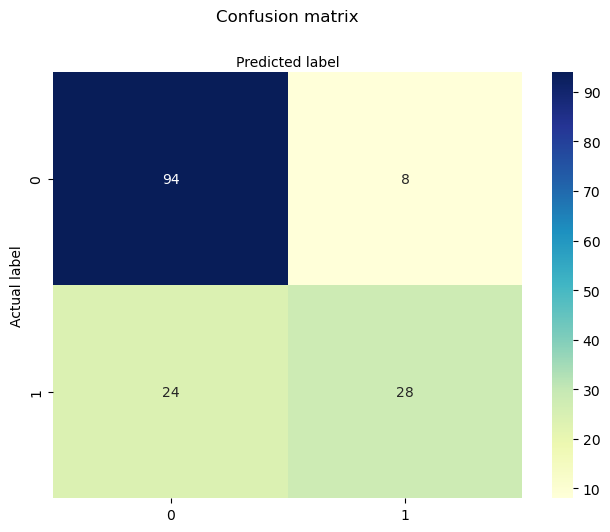

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#### we can observe 102 times actual and predicted values are same while 52 times they are not. So the accuracy using confusion matrix will be

In [40]:
print((TP + TN) / float(TP + TN + FP + FN))    # Accuracy

0.7922077922077922


## Recall 
#### It is a measure of how many truly relevant results are returned. 

In [41]:
print(TP / float(TP + FN))

0.5384615384615384


## Precision
#### When a positive value is predicted, how often is the prediction correct?
#### How "precise" is the classifier when predicting positive instances?

In [42]:
print(TP / float(TP + FP))

0.7777777777777778


### predict diabetes if the predicted probability is greater than 0.3


In [43]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob],threshold=0.3)[0]

## ROC Curves and Area Under the Curve (AUC)

In [44]:
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test.round(), y_pred_prob)

In [45]:
print(fpr[1:10])
print(tpr[1:10])
print(thresholds[1:10])

[0.         0.         0.00980392 0.00980392 0.01960784 0.01960784
 0.03921569 0.03921569 0.04901961]
[0.01923077 0.26923077 0.26923077 0.30769231 0.30769231 0.32692308
 0.32692308 0.42307692 0.42307692]
[0.99180885 0.76282093 0.72637597 0.71974193 0.71034372 0.69781404
 0.6854413  0.64823283 0.64552128]


#### Area under the curve

In [46]:
auc=metrics.roc_auc_score(y_test.round(), y_pred_prob)
print(auc)

0.8395550527903469


#### Plot ROC Curve

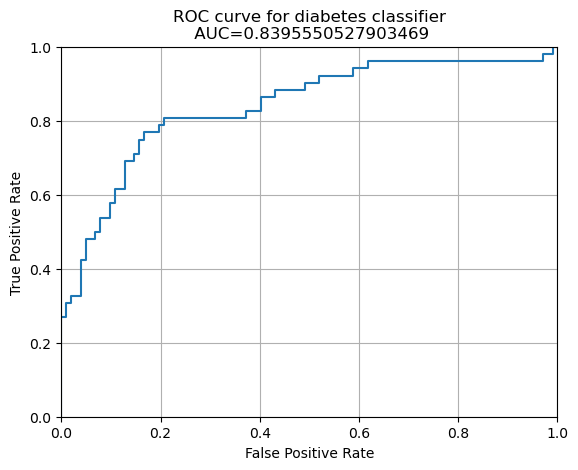

In [47]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier\n AUC={auc}'.format(auc=metrics.roc_auc_score(y_test.round(), y_pred_prob)))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

#### define a function that accepts a threshold and prints TP and FP rates

In [48]:
def evaluate_threshold(threshold):
    print('True Positive Rate:', tpr[thresholds > threshold][-1])
    print('False Positive Rate:', fpr[thresholds > threshold][-1])
    y_pred_class = binarize([y_pred_prob], threshold=threshold)[0]
    print('Accuracy:', metrics.accuracy_score(y_test.round(), y_pred_class))

evaluate_threshold(0.35)
evaluate_threshold(0.5)

True Positive Rate: 0.7115384615384616
False Positive Rate: 0.1568627450980392
Accuracy: 0.8051948051948052
True Positive Rate: 0.5384615384615384
False Positive Rate: 0.0784313725490196
Accuracy: 0.7922077922077922


## AUC
AUC is the percentage of the ROC plot that is underneath the curve:

In [49]:
print(metrics.roc_auc_score(y_test.round(), y_pred_prob))

0.8395550527903469


## Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.1)

cv_scores = cross_val_score(clf, X, y.round(), cv=10, scoring='roc_auc')
print(cv_scores)
print(cv_scores.mean())
print(cv_scores.std())

[0.73971631 0.86479592 0.79583333 0.7822695  0.80995475 0.85131195
 0.76870748 0.92374214 0.83675144 0.82886905]
0.8201951876367488
0.05029249609222649


#### try lambda=0.0001 through lambda=2 and record testing accuracy

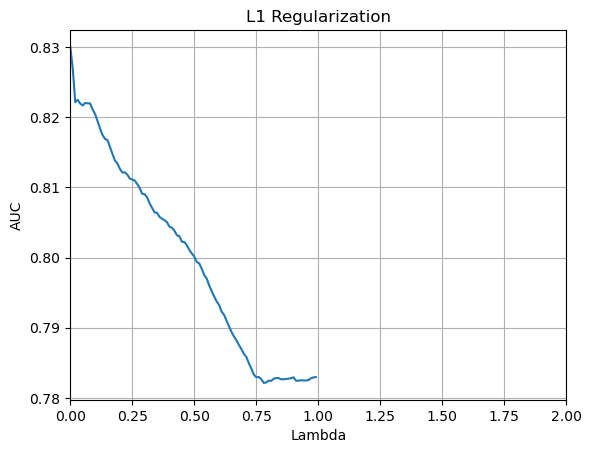

In [51]:
import numpy as np
lambda_range = np.arange(0.00001, 1, 0.01)
scores = []
for lam in lambda_range:
    logreg_lasso = Lasso(alpha=lam)
    scores.append(cross_val_score(logreg_lasso, X, y.round(), cv=5, scoring='roc_auc').mean())

import matplotlib.pyplot as plt

plt.plot(lambda_range, scores)
plt.xlim([0.0, 2])
plt.title('L1 Regularization')
plt.xlabel('Lambda')
plt.ylabel('AUC')
plt.grid(True)

## Ridge Regression

In [52]:
from sklearn.linear_model import RidgeClassifier
clf = RidgeClassifier(alpha=0.1)

cv_scores = cross_val_score(clf, X, y.round(), cv=10, scoring='roc_auc')
print(cv_scores.mean())
print(cv_scores.std())

0.8289366515837104
0.04012373186535119


#### try lambda=0.0001 through lambda=2 and record testing accuracy

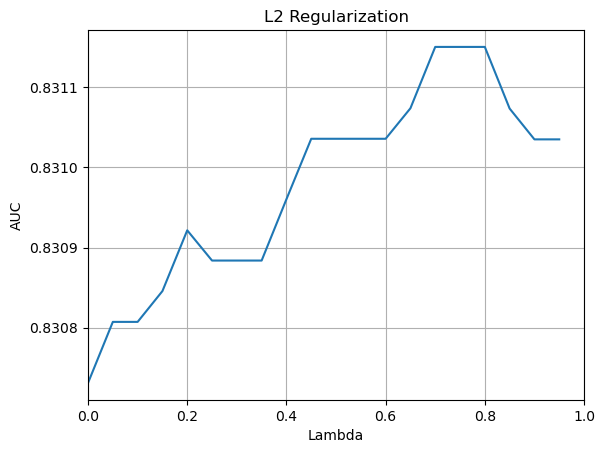

In [53]:
import numpy as np
lambda_range = np.arange(0.00001, 1, 0.05)
scores = []
for lam in lambda_range:
    logreg_ridge = RidgeClassifier(alpha=lam)
    scores.append(cross_val_score(logreg_ridge, X, y.round(), cv=5, scoring='roc_auc').mean())

import matplotlib.pyplot as plt

plt.plot(lambda_range, scores)
plt.xlim([0.0, 1])
plt.title('L2 Regularization')
plt.xlabel('Lambda')
plt.ylabel('AUC')
plt.grid(True)

## Maximum accuracy achieved is 83.83%

# -----------------------------------------------------------------------------------------------------------

## INTERPRETATION FOR BUSINESS

.Early detection and prevention of individuals at risk allows for earlier cure and  reduces healthcare cost.

.The model can help healthcare providers to prioritize resources for people at risk individuals & optimizing resource utilization

.Model can be used to personalize prevention and treatment plans based on individual risk profiles.
    
.identifying early intervention and risk management can lead to better health outcomes for individuals with diabetes

# -----------------------------------------------------------------------------------------------------------

# Thank You